# Визуализация данных
`Задача: визуализировать данные об отзывах о сортах вин`
* Этап 1: разобрать фильтрацию таблиц в pandas
* Этап 2: создать ряд графиков с помощью matplotlib


In [15]:
!pip3 install mysqlclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mysqlclient: filename=mysqlclient-2.2.0-cp310-cp310-linux_x86_64.whl size=123672 sha256=3b1d644aef059271c47750ce926347ca5aa1da5ca99b0de5135aaa9f36dbfa5f
  Stored in directory: /root/.cache/pip/wheels/a4/f8/fd/0399687c0abd03c10c975ed56c692fcd3d0fb80440b5a661f1
Successfully built mysqlclient


In [73]:
!pip3 install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7


In [16]:
# импорты
import pandas as pd
import matplotlib.pyplot as plt
import MySQLdb

## 01. Загрузка данных

In [10]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [13]:
# # Создание датафрейма из файла
# df = pd.read_csv('winemag-data_first150k.csv.gz')
# df.head()

In [82]:
# Создание датафрейма из sql-запроса
conn = MySQLdb.connect(
      host="rc1b-olbk6qq6dcsw8zkq.mdb.yandexcloud.net",
      port=3306,
      db="winemag150",
      user="student",
      passwd="n123456789",)

df = pd.read_sql_query('SELECT * FROM wines;', con=conn)
df.head()

<ipython-input-82-f9920a743f7e>:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,None,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,None,Provence red blend,Domaine de la Bégude


## 02. Графики matplotlib

<Axes: >

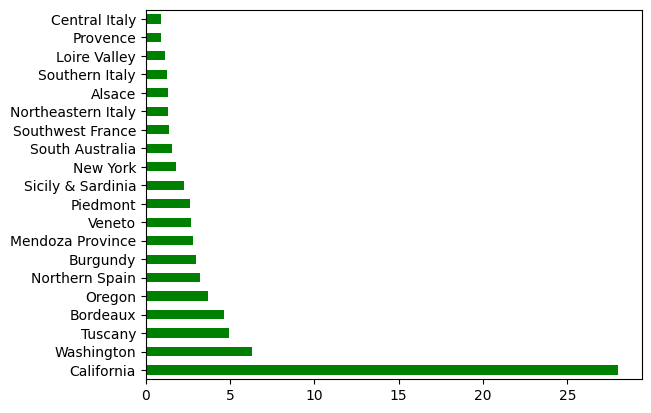

In [64]:
# одномнерные графики - для одного признака
# для категориального признака - частотный анализ
# value_counts() - провести частотный анализ

# df['province'].value_counts().head(20).plot.bar(color='red')
# df['province'].value_counts().head(20).plot.pie()
(df['province'].value_counts().head(20) / len(df) * 100).plot.barh(color='green')


<Axes: >

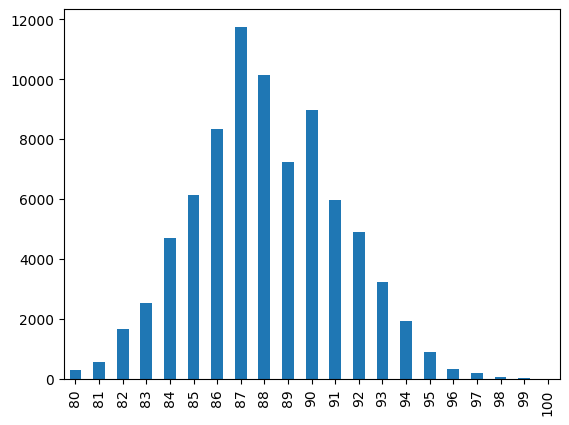

In [65]:
df['points'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

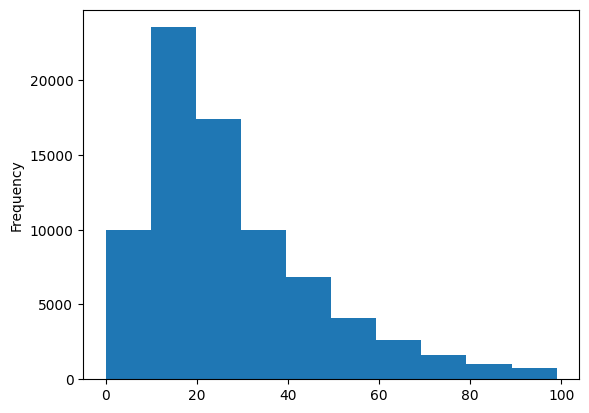

In [63]:
# для количественного признака price используем гистограмму
df[df['price'] < 100]['price'].plot.hist()

<Axes: xlabel='price', ylabel='points'>

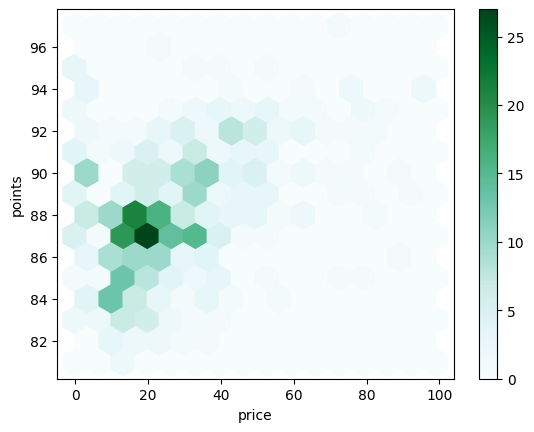

In [70]:
# Многомерные графики

# диаграмма рассеяния
# df.plot.scatter(x='price', y='points')
# df[df['price'] < 100].plot.scatter(x='price', y='points')
# df[df['price'] < 100].sample(500).plot.scatter(x='price', y='points')
df[df['price'] < 100].sample(500).plot.hexbin(x='price', y='points', gridsize=15)

<Axes: ylabel='Frequency'>

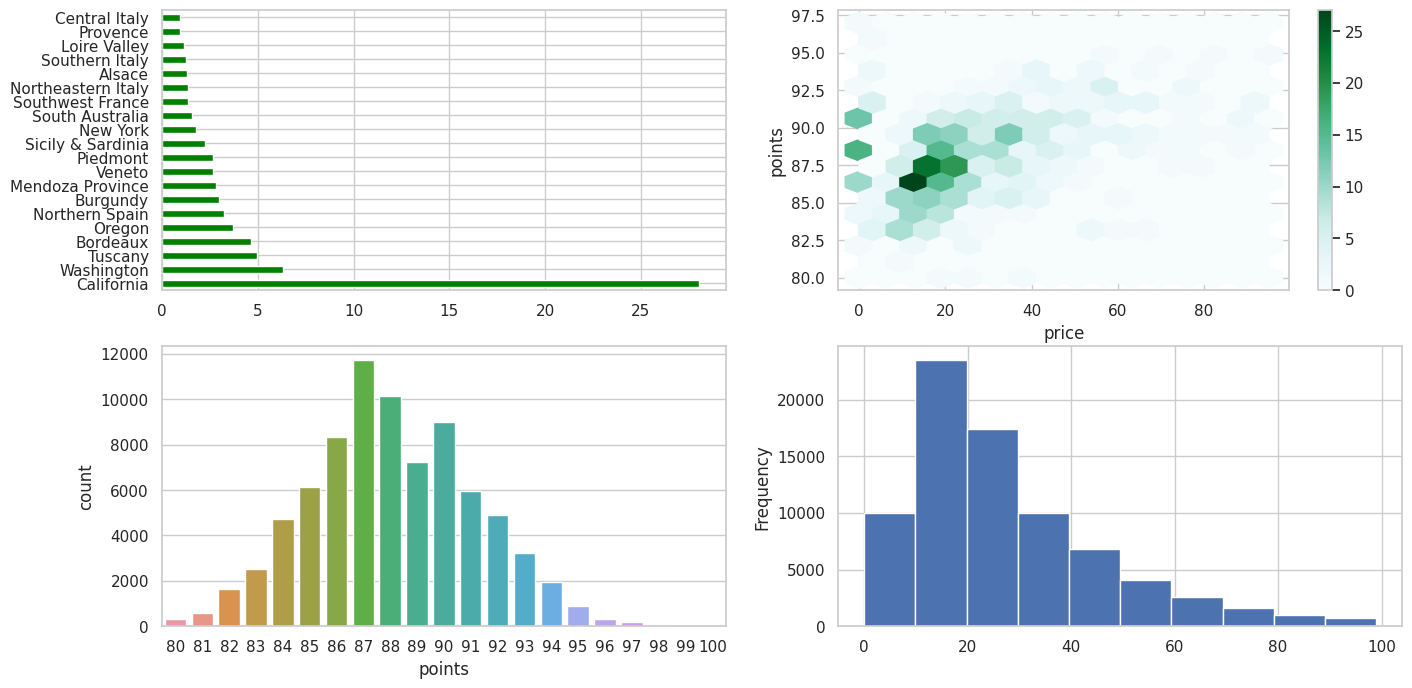

In [87]:
# subplots

fig, axes = plt.subplots(2, 2, figsize = (16, 8))

(df['province'].value_counts().head(20) / len(df) * 100).plot.barh(color='green', ax=axes[0][0])

df[df['price'] < 100].sample(500).plot.hexbin(x='price', y='points', gridsize=15, ax=axes[0][1])

sns.countplot(x=df['points'], ax=axes[1][0])

df[df['price'] < 100]['price'].plot.hist(ax=axes[1][1])

<Axes: xlabel='points', ylabel='count'>

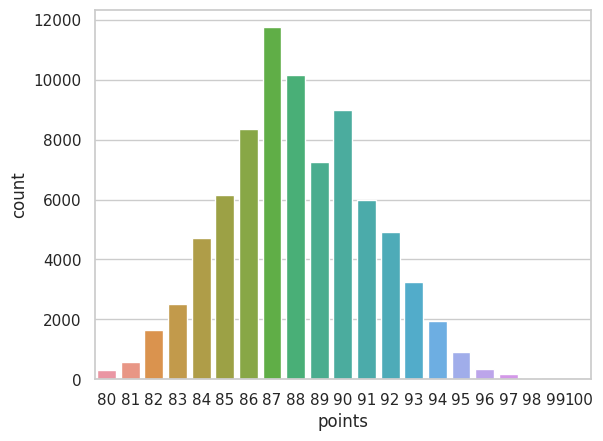

In [71]:
# Чуть более красивые графики
import seaborn as sns
sns.set_theme(style='whitegrid')

sns.countplot(x=df['points'])



In [74]:
# дашборды dash/plotly.js
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.


from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd


app = Dash(__name__)

df = pd.read_csv('https://gist.githubusercontent.com/chriddyp/5d1ea79569ed194d432e56108a04d188/raw/a9f9e8076b837d541398e999dcbac2b2826a81f8/gdp-life-exp-2007.csv')

fig = px.scatter(df, x="gdp per capita", y="life expectancy",
                 size="population", color="continent", hover_name="country",
                 log_x=True, size_max=60)

app.layout = html.Div([
    dcc.Graph(
        id='life-exp-vs-gdp',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>